## Experiment 5: TOVIMA Tf-Idf

Analyze the posts text using Tf-Idf features.

Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a greek spaCy model for nlp
import spacy
nlp = spacy.load("el_core_news_sm")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

Load and cleanup the data file

In [2]:
# Load the csv file containing the posts
# Use only "URL", "Link Text" and "Total Interactions" columns
posts_df = pd.read_csv("Datasets/tovima/tovima.csv",
                       usecols=["URL", "Link Text", "Total Interactions"]).head(522)[
    ["URL", "Link Text", "Total Interactions"]]

# Remove the " | Ειδήσεις - νέα - Το Βήμα Online" suffix from the "Link Text" column
posts_df["Link Text"] = posts_df["Link Text"].apply(
    lambda x: x[:-len(" | Ειδήσεις - νέα - Το Βήμα Online")] if x.endswith(" | Ειδήσεις - νέα - Το Βήμα Online") else x)

# Drop rows with missing values values
posts_df = posts_df.dropna().reset_index(drop=True)

# Filter out rows with "Total Interactions" values below 0.05 quantile and above 0.95 quantile
posts_df = posts_df.loc[(posts_df["Total Interactions"] >= posts_df[
    "Total Interactions"].quantile(.05)) & (posts_df["Total Interactions"] <= posts_df[
    "Total Interactions"].quantile(.95))].reset_index(drop=True)
posts_df

,URL,Link Text,Total Interactions
0,https://www.facebook.com/184884834877395/posts...,Οσιαν Βουόνγκ: Ο 33χρονος ποιητής που μαγεύει ...,0
1,https://www.facebook.com/184884834877395/posts...,Πώς ο ύπνος σχετίζεται με το έμφραγμα,0
2,https://www.facebook.com/184884834877395/posts...,Πόσο επικίνδυνη είναι η ινδική μετάλλαξη;,3
3,https://www.facebook.com/184884834877395/posts...,Μπουρλά: Ίσως εντός 2021 το χάπι για covid,3
4,https://www.facebook.com/184884834877395/posts...,Χριστίνα Χειλά Φαμέλη: Σοκάρει μιλώντας για τη...,0
...,...,...,...
491,https://www.facebook.com/184884834877395/posts...,Πού θα γίνονται δωρεάν rapid test την Τετάρτη,0
492,https://www.facebook.com/184884834877395/posts...,Γαλάζια σημαία:Ασημένια η Ελλάδα - Οι 545 ακτέ...,7
493,https://www.facebook.com/184884834877395/posts...,Χαλάει ο καιρός - Πού και πότε θα βρέξει,1
494,https://www.facebook.com/184884834877395/posts...,Ανησυχεί η «αθηναϊκή μετάλλαξη» – Τι λένε οι ε...,1


Split dataset to train and test subsets

In [3]:
train_df, test_df = train_test_split(posts_df, test_size=0.25, random_state=42)

Tf-Idf vectorizer

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# Remove greek stopwords using spaCy
vec = TfidfVectorizer(stop_words=spacy.lang.el.stop_words.STOP_WORDS)

train_x = vec.fit_transform(train_df["Link Text"])
train_x = pd.DataFrame(train_x.toarray(), columns=vec.get_feature_names())

test_x = vec.transform(test_df["Link Text"])
test_x = pd.DataFrame(test_x.toarray(), columns=vec.get_feature_names())

Regression problem

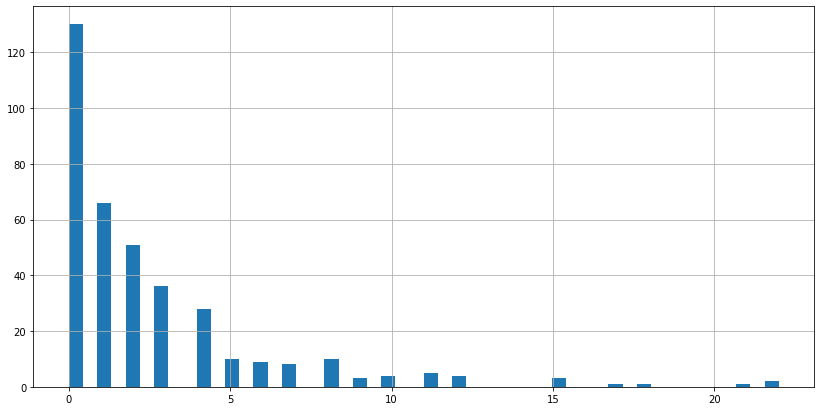

In [5]:
train_y = train_df["Total Interactions"]
test_y = test_df["Total Interactions"]

# Plot how the column we will be predicting looks like
train_df["Total Interactions"].hist(figsize=(14, 7), bins=50)
plt.show()

In [6]:
# Train and test the LinearRegression model
lin_reg = LinearRegression().fit(train_x, train_y)
pred_y = lin_reg.predict(test_x)

print('r2_score:', metrics.r2_score(test_y, pred_y))
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))

r2_score: -2.047866919765401e+25
MAE: 10190352452767.178
MSE: 3.410239156301058e+26


In [7]:
# Train and test the KNeighborsRegressor model
kn_reg = KNeighborsRegressor().fit(train_x, train_y)
pred_y = kn_reg.predict(test_x)

print('r2_score:', metrics.r2_score(test_y, pred_y))
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))

r2_score: -0.37887655193691905
MAE: 3.929032258064516
MSE: 22.96193548387097


In [8]:
# Train and test the RandomForestRegressor model
rf_reg = RandomForestRegressor(n_estimators=200).fit(train_x, train_y)
pred_y = rf_reg.predict(test_x)

print('r2_score:', metrics.r2_score(test_y, pred_y))
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))

r2_score: -0.4123069769022729
MAE: 3.7363607910906302
MSE: 23.5186403318681


In [9]:
# Show features importances
important_features = pd.Series(data=rf_reg.feature_importances_, index=train_x.columns)
important_features.sort_values(ascending=False, inplace=True)
important_features.astype(float)

ελλάδα            0.030757
εμβολιασμένους    0.025606
στεφανιαία        0.025561
νόσο              0.022252
ασύλου            0.021509
                    ...   
προχωρούν         0.000000
αντισώματα        0.000000
πραγματικότητα    0.000000
πραγμάτων         0.000000
αυστρία           0.000000
Length: 1241, dtype: float64

Classification problem

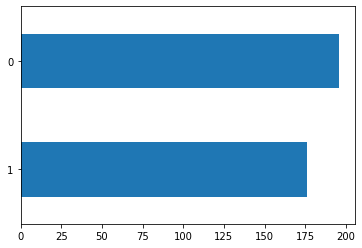

In [10]:
# For classification, we consider 2 categories:
#   -Class 0: posts with "Total Interactions" below the column's median
#   -Class 1: posts with "Total Interactions" above the column's median

median = train_df["Total Interactions"].median()

train_y = train_df["Total Interactions"].apply(lambda x: int(x > median))
test_y = test_df["Total Interactions"].apply(lambda x: int(x > median))

# Plot how the column we will be predicting looks like
train_df["Total Interactions"].apply(
    lambda x: int(x > median)).value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [11]:
# Train and test the LogisticRegression model
lr_clf = LogisticRegression(solver='lbfgs').fit(train_x, train_y)
pred_y = lr_clf.predict(test_x)

print('accuracy:', metrics.accuracy_score(test_y, pred_y))
print('classification_report:\n', metrics.classification_report(test_y, pred_y))

accuracy: 0.47580645161290325
classification_report:
               precision    recall  f1-score   support

           0       0.48      0.65      0.55        62
           1       0.46      0.31      0.37        62

    accuracy                           0.48       124
   macro avg       0.47      0.48      0.46       124
weighted avg       0.47      0.48      0.46       124



In [12]:
# Train and test the KNeighborsClassifier model
kn_clf = KNeighborsClassifier().fit(train_x, train_y)
pred_y = kn_clf.predict(test_x)

print('accuracy:', metrics.accuracy_score(test_y, pred_y))
print('classification_report:\n', metrics.classification_report(test_y, pred_y))

accuracy: 0.47580645161290325
classification_report:
               precision    recall  f1-score   support

           0       0.41      0.11      0.18        62
           1       0.49      0.84      0.62        62

    accuracy                           0.48       124
   macro avg       0.45      0.48      0.40       124
weighted avg       0.45      0.48      0.40       124



In [13]:
# Train and test the RandomForestClassifier model
rf_clf = RandomForestClassifier(n_estimators=200).fit(train_x, train_y)
pred_y = rf_clf.predict(test_x)

print('accuracy:', metrics.accuracy_score(test_y, pred_y))
print('classification_report:\n', metrics.classification_report(test_y, pred_y))

accuracy: 0.4274193548387097
classification_report:
               precision    recall  f1-score   support

           0       0.42      0.35      0.38        62
           1       0.44      0.50      0.47        62

    accuracy                           0.43       124
   macro avg       0.43      0.43      0.42       124
weighted avg       0.43      0.43      0.42       124



In [14]:
# Show features importances
important_features = pd.Series(data=rf_clf.feature_importances_, index=train_x.columns)
important_features.sort_values(ascending=False, inplace=True)
important_features.astype(float)

νέα          1.877880e-02
online       1.845210e-02
βήμα         1.697819e-02
ειδήσεις     1.689430e-02
κρούσματα    9.193865e-03
                 ...     
76           1.184678e-06
μάρκετ       9.002507e-07
δρόμο        8.412074e-07
188          4.516978e-07
γέμισαν      0.000000e+00
Length: 1241, dtype: float64